<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Input</a></span></li><li><span><a href="#read-metadata-obtained-from-the-NCBI-Virus-Database" data-toc-modified-id="read-metadata-obtained-from-the-NCBI-Virus-Database-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>read metadata obtained from the NCBI Virus Database</a></span></li><li><span><a href="#Basic-information" data-toc-modified-id="Basic-information-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic information</a></span><ul class="toc-item"><li><span><a href="#add-host-label" data-toc-modified-id="add-host-label-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>add host label</a></span></li><li><span><a href="#add-virus_ID" data-toc-modified-id="add-virus_ID-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>add virus_ID</a></span></li><li><span><a href="#randomly-sampling-two-sequences-for-each-segment" data-toc-modified-id="randomly-sampling-two-sequences-for-each-segment-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>randomly sampling two sequences for each segment</a></span></li><li><span><a href="#check-no.-of-segment-sequences-for-each-virus-strain" data-toc-modified-id="check-no.-of-segment-sequences-for-each-virus-strain-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>check no. of segment sequences for each virus strain</a></span></li><li><span><a href="#check-sequence-lengths" data-toc-modified-id="check-sequence-lengths-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>check sequence lengths</a></span></li><li><span><a href="#extract->500-bp-sequences" data-toc-modified-id="extract->500-bp-sequences-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>extract &gt;500-bp sequences</a></span></li><li><span><a href="#collection-date-of-viral-data" data-toc-modified-id="collection-date-of-viral-data-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>collection date of viral data</a></span></li></ul></li><li><span><a href="#Divided-data-into-the-Past-and-Future-Viral-Datasets" data-toc-modified-id="Divided-data-into-the-Past-and-Future-Viral-Datasets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Divided data into the Past and Future Viral Datasets</a></span></li><li><span><a href="#output" data-toc-modified-id="output-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>output</a></span></li></ul></div>

In [205]:
#!/usr/bin/env python
import sys, re
argvs = sys.argv
sys.setrecursionlimit(10000000)

import os
import collections
import numpy as np
import pandas as pd
import array
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 300)

import glob

## visualize
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = "Arial"

# Input

In [206]:
virus_family="Hantaviridae"
segment_no = 0

# read metadata obtained from the NCBI Virus Database

In [207]:
##
info_f = "/".join(map(str, ["input_examples", virus_family + ".csv"]))

df_info = pd.read_csv(info_f)
df_info.head(3)

,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,Family,Molecule_type,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_077666.1,Puumala orthohantavirus,NaN,"Giebel,L.B., Stohwasser,R., Zoller,L., Bautz,E.K., Darai,G.","National Center for Biotechnology Information, NIH",USA,2023-05-06T00:00:00Z,NaN,Puumala orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),3682,RefSeq,complete,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Puumala virus CG1820 virus M genome segment, complete cds"
1,NC_077667.1,Puumala orthohantavirus,NaN,"Stohwasser,R., Raab,K., Darai,G., Bautz,E.K.","National Center for Biotechnology Information, NIH",USA,2023-05-06T00:00:00Z,NaN,Puumala orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),6550,RefSeq,complete,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puumala virus CG1820 RNA-dependent RNA polymerase gene in L RNA segment
2,NC_077668.1,Puumala orthohantavirus,NaN,"Stohwasser,R., Giebel,L.B., Zoller,L., Bautz,E.K., Darai,G.","National Center for Biotechnology Information, NIH",USA,2023-05-06T00:00:00Z,NaN,Puumala orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),1784,RefSeq,complete,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Puumala virus CG1820 segment S nucleocapsid protein mRNA, 5' end"


# Basic information

## add host label

In [208]:
df_info["host_label"] = 0
df_info["Host"] = df_info["Host"].fillna("NA")
df_info.loc[df_info["Host"].str.contains("Homo"), "host_label"] = 1
df_info.loc[df_info["Host"].str.lower() == "human", "host_label"] =1

## add virus_ID

In [209]:
uniq_col_l = ["Accession", "Length", "GenBank_Title", "Host", "Segment"]
metadata_col_l = list(set(df_info.columns.tolist()) - set(uniq_col_l))

print (len(metadata_col_l))
print (metadata_col_l)

col_l = metadata_col_l + ["Accession", "Segment", "Length"]

df_info_1 = df_info.loc[:, col_l]
df_info_g = df_info_1.groupby(metadata_col_l, as_index=False, dropna=False).agg(
    count=("Accession", "size"), segment=("Segment", "nunique"), acc_list =("Accession", lambda x: ";".join(x)),)

df_info_g["virus_ID"] = [";".join(map(str, [virus_family, i])) for i in df_info_g.index.tolist()]

22
['Isolation_Source', 'Nuc_Completeness', 'Genotype', 'Collection_Date', 'Release_Date', 'Geo_Location', 'Org_location', 'SRA_Accession', 'Organization', 'Sequence_Type', 'Publications', 'Organism_Name', 'USA', 'Family', 'Submitters', 'BioSample', 'Country', 'Isolate', 'Molecule_type', 'host_label', 'Species', 'Genus']


In [210]:
df_info_g["acc"] = df_info_g["acc_list"].str.split(";")
df_map = df_info_g[["virus_ID", "segment", "count", "acc"]].explode("acc").reset_index(drop=True)
df_map = df_map.rename(columns={"acc": "Accession"})

shared_cols = list(set(df_map.columns.tolist()) & set(df_info.columns.tolist()) - set(["Accession"]))
df_map = df_map.merge(df_info.drop(shared_cols, axis=1), on="Accession", how="left")

In [211]:
df_map.head(3)

,virus_ID,segment,count,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,Family,Molecule_type,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title,host_label
0,Hantaviridae;0,3,3,NC_055632.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),6447,RefSeq,complete,NaN,1,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 RNA-dependent RNA polymerase gene, complete cds",0
1,Hantaviridae;0,3,3,NC_055633.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),1290,RefSeq,complete,NaN,2,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 nucleocapsid gene, complete cds",0
2,Hantaviridae;0,3,3,NC_055634.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),3402,RefSeq,complete,NaN,3,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 glycoprotein gene, complete cds",0


## randomly sampling two sequences for each segment

In [212]:
import random
random.seed(7)

df_info_virusID = df_info_g.set_index("virus_ID")

df_virus_ID = df_map.copy()
df_virus_ID["segment"] = df_virus_ID["segment"].astype("object")
df_virus_ID.loc[df_virus_ID["segment"].isnull(), "segment"] = "unassigned"


index_l = []
for virus_ID in df_virus_ID["virus_ID"].unique():
    count = df_info_virusID.loc[virus_ID, "count"]
    df = df_virus_ID[df_virus_ID["virus_ID"] == virus_ID]
    if count < 4:
        index_l.extend(df.index.tolist())
    else:
        for segment in df["Segment"].unique():
            df_1 = df[df["Segment"] == segment]
            df_1 = df_1.sort_values("Length", ascending=False)
            l = df_1.index.tolist()[:2]
            index_l.extend(l)
    
#             if virus_ID == "Arenaviridae;681":
#                 print (segment, l)

df_sampled = df_virus_ID.iloc[index_l, :]

In [213]:
df_sampled.head(3)

,virus_ID,segment,count,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,Family,Molecule_type,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title,host_label
0,Hantaviridae;0,3,3,NC_055632.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),6447,RefSeq,complete,NaN,1,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 RNA-dependent RNA polymerase gene, complete cds",0
1,Hantaviridae;0,3,3,NC_055633.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),1290,RefSeq,complete,NaN,2,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 nucleocapsid gene, complete cds",0
2,Hantaviridae;0,3,3,NC_055634.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),3402,RefSeq,complete,NaN,3,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 glycoprotein gene, complete cds",0


## check no. of segment sequences for each virus strain

<Axes: xlabel='segment', ylabel='Count'>

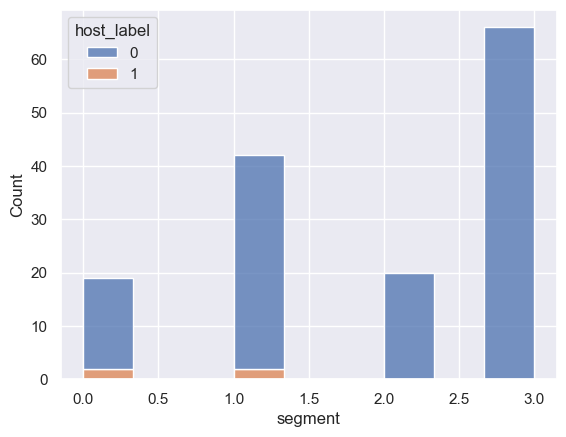

In [214]:
sns.histplot(data=df_sampled, x="segment", hue="host_label", multiple="stack")

## check sequence lengths

<Axes: xlabel='Length', ylabel='Count'>

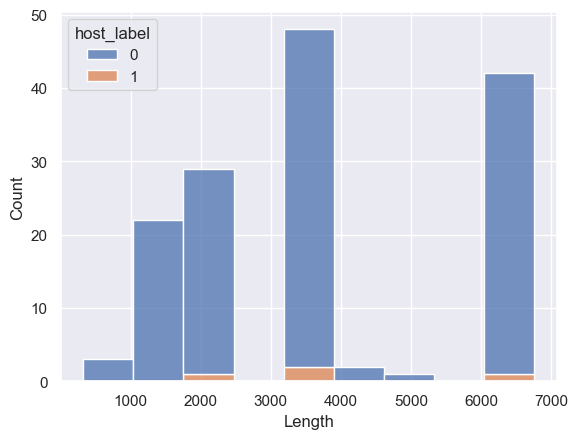

In [215]:
sns.histplot(data=df_sampled, x="Length", hue="host_label", multiple="stack")

## extract >500-bp sequences

In [216]:
df_sampled_length = df_sampled[df_sampled["Length"] > 500]

## collection date of viral data

In [217]:
df_sampled_length.head(3)

,virus_ID,segment,count,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,Family,Molecule_type,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title,host_label
0,Hantaviridae;0,3,3,NC_055632.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),6447,RefSeq,complete,NaN,1,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 RNA-dependent RNA polymerase gene, complete cds",0
1,Hantaviridae;0,3,3,NC_055633.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),1290,RefSeq,complete,NaN,2,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 nucleocapsid gene, complete cds",0
2,Hantaviridae;0,3,3,NC_055634.1,Robina orthohantavirus,NaN,"Smith,C.S., Gordon,A., Agnihotri,K., Underwood,D., Pyne,M., Jane,O.E.","National Center for Biotechnology Information, NIH",USA,2021-06-01T00:00:00Z,P17-14855,Robina orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),3402,RefSeq,complete,NaN,3,NaN,Australia,Australia,NaN,Pteropus alecto,brain,2017/7/3,NaN,"Robina orthohantavirus isolate P17-14855 glycoprotein gene, complete cds",0


/var/folders/ty/4bj553gd6mddwlrt75bs49yh0000gp/T/ipykernel_83005/55813485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_length["Collection_Date"] = pd.to_datetime(
/var/folders/ty/4bj553gd6mddwlrt75bs49yh0000gp/T/ipykernel_83005/55813485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_length["Release_Date"] = pd.to_datetime(
/var/folders/ty/4bj553gd6mddwlrt75bs49yh0000gp/T/ipykernel_83005/55813485.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

<Axes: xlabel='collection_year', ylabel='Count'>

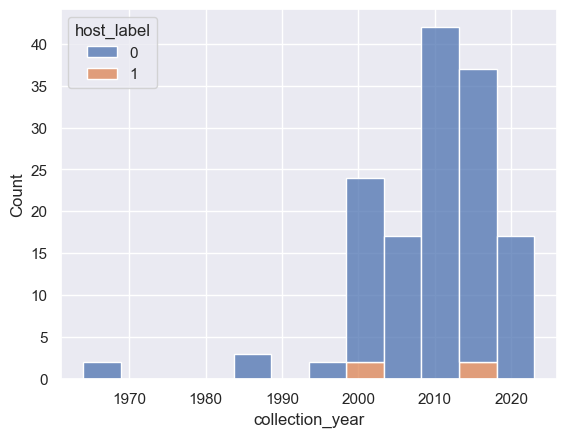

In [218]:
import pandas as pd
import seaborn as sns

# Collection_Date / Release_Date を混在フォーマット対応で日付変換
df_sampled_length["Collection_Date"] = pd.to_datetime(
    df_sampled_length["Collection_Date"],
    format="mixed",
    errors="coerce",
    utc=True
)

df_sampled_length["Release_Date"] = pd.to_datetime(
    df_sampled_length["Release_Date"],
    format="mixed",
    errors="coerce",
    utc=True
)

# 年を抽出
df_sampled_length["collection_year"] = df_sampled_length["Collection_Date"].dt.year

# Collection_Date が取れない行は Release_Date で補完
mask = df_sampled_length["collection_year"].isnull()
df_sampled_length.loc[mask, "collection_year"] = df_sampled_length.loc[mask, "Release_Date"].dt.year

# → intに揃える（NaNはそのままなら object になるので）
df_sampled_length["collection_year"] = df_sampled_length["collection_year"].astype("Int64")

# プロット
sns.histplot(data=df_sampled_length, x="collection_year", hue="host_label", multiple="stack")


# Divided data into the Past and Future Viral Datasets

In [219]:
df_sampled_length["dataset"] = "known"
df_sampled_length.loc[df_sampled_length["collection_year"] >= 2018, "dataset"] = "unknown"

/var/folders/ty/4bj553gd6mddwlrt75bs49yh0000gp/T/ipykernel_83005/1077768331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_length["dataset"] = "known"


In [220]:
df_sampled_length.groupby(["dataset", "host_label"]).agg(seq_no=("virus_ID", "nunique"))

seq_no
dataset host_label        
known   0               59
        1                2
unknown 0               23
        1                1

# output

In [221]:
output_f = "/".join(map(str, ["output_examples", virus_family + ".curated.csv"]))

df_sampled_length.to_csv(output_f, sep="\t", index=False)